In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import random

In [2]:
np.random.seed(42)
n_cities  = 5
points = np.random.rand(n_cities, 2) * 100

In [3]:
def distance_matrix(indices):
    selected_points = points[indices]
    return squareform(pdist(selected_points, 'euclidean'))

In [4]:
def route_length(permutation, distance_matrix):
    length = 0
    for i in range(len(permutation)):
        length += distance_matrix[permutation[i-1], permutation[i]]
    return length

def generate_neighborhood(permutation):
    a, b = random.sample(range(len(permutation)), 2)
    new_permutation = permutation[:]
    new_permutation[a], new_permutation[b] = new_permutation[b], new_permutation[a]
    return new_permutation

def random_solution():
    permutation = list(range(n_cities))
    random.shuffle(permutation)
    return permutation

random_permutation = random_solution()
neighborhood = generate_neighborhood(random_permutation)
length = route_length(random_permutation, distance_matrix(random_permutation))

print(f'Random permutation: \t{random_permutation}')
print(f'Neighborhood: \t\t{neighborhood}')
print(f'Route length: \t\t{length}')

Random permutation: 	[3, 4, 2, 1, 0]
Neighborhood: 		[3, 2, 4, 1, 0]
Route length: 		332.57294900266527


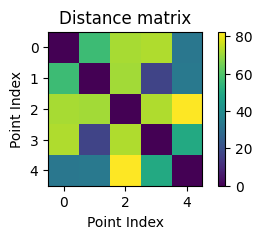

In [5]:
plt.figure(figsize=(4, 2))
plt.imshow(distance_matrix(random_permutation))
plt.colorbar()
plt.title('Distance matrix')
plt.xlabel('Point Index')
plt.ylabel('Point Index')
plt.show()

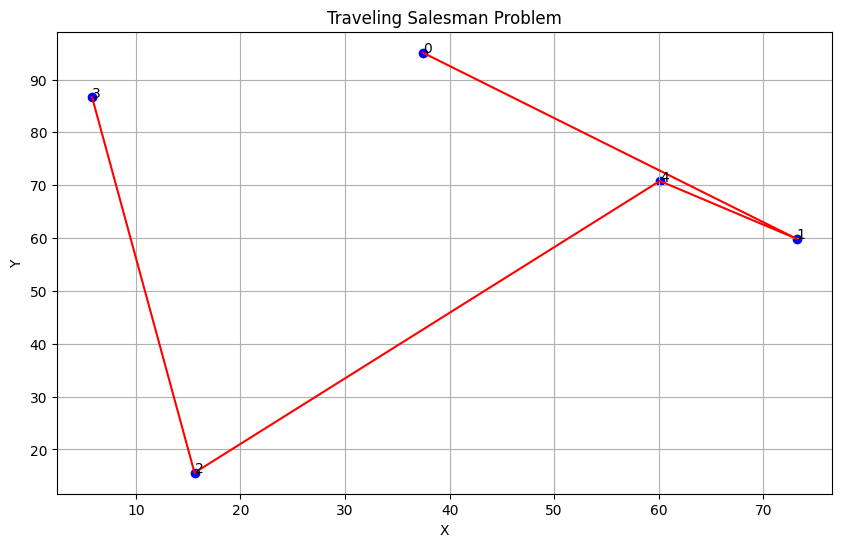

In [6]:
def display_route(route):
    plt.figure(figsize=(10, 6))
    plt.scatter(points[:, 0], points[:, 1], color='blue')
    plt.plot(points[route, 0], points[route, 1], color='red')
    plt.title(f'Traveling Salesman Problem')
    plt.xlabel('X')
    plt.ylabel('Y')
    for i, txt in enumerate(range(len(points))):
        plt.annotate(txt, (points[i, 0], points[i, 1]))
    plt.grid(True)
    plt.show()
    
display_route(neighborhood)

Shortest route: (1, 2, 3, 0, 4)
Minimum distance: 242.5914293256707


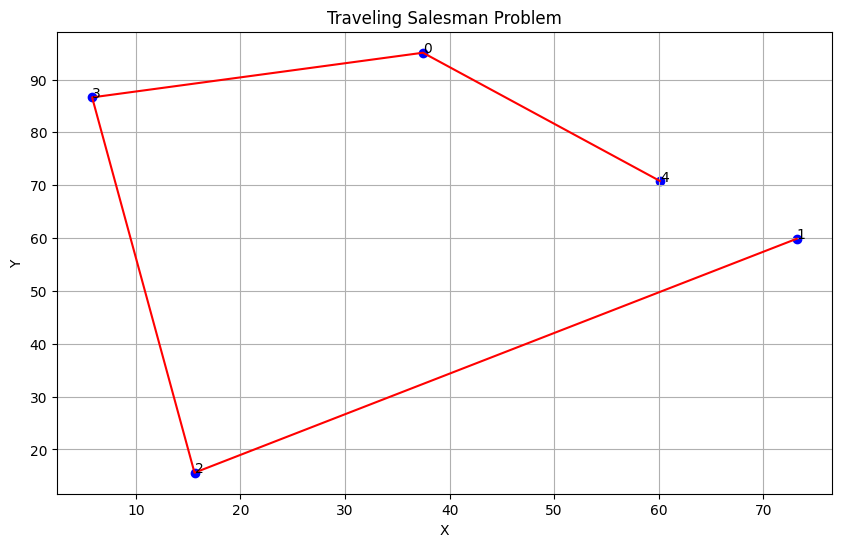

In [7]:
from itertools import permutations

def brute_force():    
    all_routes = permutations(range(len(points)))
    min_distance = float('inf')
    shortest_route = None
    
    for route in all_routes:
        route_list = list(route)
        current_distance = route_length(route_list, distance_matrix(route_list))
        if current_distance < min_distance:
            min_distance = current_distance
            shortest_route = route
    
    return shortest_route, min_distance

shortest_route, min_distance = brute_force()

print("Shortest route:", shortest_route)
print("Minimum distance:", min_distance)

display_route(shortest_route)